In [1]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('hw_data_set_1.csv')
test_data  = pd.read_csv('hw_data_set_2.csv')
headers = pd.read_excel('hw_set_data_dictionary.xls')

In [ ]:
from CarPricePredictionModel import CarPricePredictionModel
data_path = 'hw_data_set_1.csv'
car_price_prediction = CarPricePredictionModel(data_path)

# Run all models
car_price_prediction.run_all_models(mode="all")



In [4]:
from CarPricePredictionModel import  CarPricePredictionModel

data_path = 'hw_data_set_1.csv'
car_price_prediction =  CarPricePredictionModel(data_path)

models= [
    'LinearRegression',
    'DecisionTreeRegressor',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'XGBRegressor'
]

# get prediction
pred = car_price_prediction.mlflow_prediction(models[0], test_data)

# print prediction
pred.head()

c:\Users\omer_\Downloads\Truecar-MLE-assignment\Truecar-assignment\CarPricePredictionModel.py:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data.fillna(method='ffill', inplace=True)
c:\Users\omer_\miniconda3\envs\kohls\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Price
0,34279.652875
1,45484.136669
2,43570.622863
3,33386.090838
4,35447.244998


In [6]:
pred.to_csv("omer_yilmaz.csv", index =False)

In [ ]:
data.head()

,sales_week,sales_date,transaction_id,year,make,model_id,model,drive_type,door,transmission,...,customercash,finance,lease,cash,trim,trim_id,make_id,longitude,latitude,price
0,24APR2010,24APR2010,608918958,2010,Honda,63381,Fit,FWD,4,Automatic,...,0,0,1,0,5dr HB Auto Sport,1654428,1620,-74.315748,41.182254,18959.264305
1,02JAN2010,02JAN2010,260621396,2009,Toyota,56865,Corolla,FWD,4,Automatic,...,750,0,1,0,4dr Sdn Auto S (Natl),1546648,1644,-97.876902,30.170527,22336.774183
2,27FEB2010,27FEB2010,424551281,2010,Hyundai,60726,Sonata,FWD,4,Automatic,...,0,0,1,0,4dr Sdn 2.4L Auto GLS,1664683,1557,-115.315133,36.308840,21213.933956
3,16JAN2010,16JAN2010,289620930,2010,Honda,62856,Odyssey,FWD,4,Automatic,...,0,1,0,0,5dr Touring Elite,1650403,1620,-82.099054,26.991101,44018.166912
4,28NOV2009,28NOV2009,120457404,2010,Honda,62856,Odyssey,FWD,4,Automatic,...,0,1,0,0,5dr EX-L w/Navi,1650388,1620,-80.341466,25.890138,36003.185030


In [ ]:
test_data.head()

,sales_week,sales_date,transaction_id,year,make,model_id,model,drive_type,door,transmission,...,dealercash,customercash,finance,lease,cash,trim,trim_id,make_id,longitude,latitude
0,24OCT2009,24OCT2009,16272160,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,0,0,1,0,4dr Sdn 328i RWD,1622188,2359,-86.765654,36.165353
1,24OCT2009,24OCT2009,16209273,2010,BMW,60891,3 Series,RWD,2,Manual,...,0,0,1,0,0,2dr Conv 328i,1622168,2359,-86.497541,33.592120
2,24OCT2009,24OCT2009,14586748,2010,BMW,60891,3 Series,RWD,4,Automatic,...,0,0,0,0,1,4dr Sdn 335d RWD,1622233,2359,-97.179563,33.359586
3,24OCT2009,24OCT2009,16262283,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,0,0,0,1,4dr Sdn 328i RWD,1622188,2359,-84.319565,42.003218
4,24OCT2009,24OCT2009,10113511,2010,BMW,60891,3 Series,RWD,4,Manual,...,0,0,1,0,0,4dr Sdn 328i RWD,1622188,2359,-122.547172,48.023245


In [ ]:
headers.head()

,field,description
0,sales_date,Date of sale
1,sales_week,Week of sale. The date is the end of the week
2,transaction_id,Unique ID for the transaction
3,year,Year of the vehicle sold
4,make,make of the vehicle sold


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124028 entries, 0 to 124027
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sales_week        124028 non-null  object 
 1   sales_date        124028 non-null  object 
 2   transaction_id    124028 non-null  int64  
 3   year              124028 non-null  int64  
 4   make              124028 non-null  object 
 5   model_id          124028 non-null  int64  
 6   model             124028 non-null  object 
 7   drive_type        124028 non-null  object 
 8   door              124028 non-null  int64  
 9   transmission      124028 non-null  object 
 10  base_msrp         124028 non-null  int64  
 11  engine            124028 non-null  object 
 12  transaction_msrp  124028 non-null  int64  
 13  destination       124028 non-null  int64  
 14  bodytype          124028 non-null  object 
 15  zip               124028 non-null  int64  
 16  State             12

In [ ]:
categorical_columns = data.select_dtypes(exclude='number').columns

print(categorical_columns)

Index(['sales_week', 'sales_date', 'make', 'model', 'drive_type',
       'transmission', 'engine', 'bodytype', 'State', 'trim'],
      dtype='object')


In [ ]:

# Assuming you have a DataFrame named 'data'
numeric_cols = data.select_dtypes(include='number').columns

print(numeric_cols)

Index(['transaction_id', 'year', 'model_id', 'door', 'base_msrp',
       'transaction_msrp', 'destination', 'zip', 'dealercash', 'customercash',
       'finance', 'lease', 'cash', 'trim_id', 'make_id', 'longitude',
       'latitude', 'price'],
      dtype='object')


<Axes: >

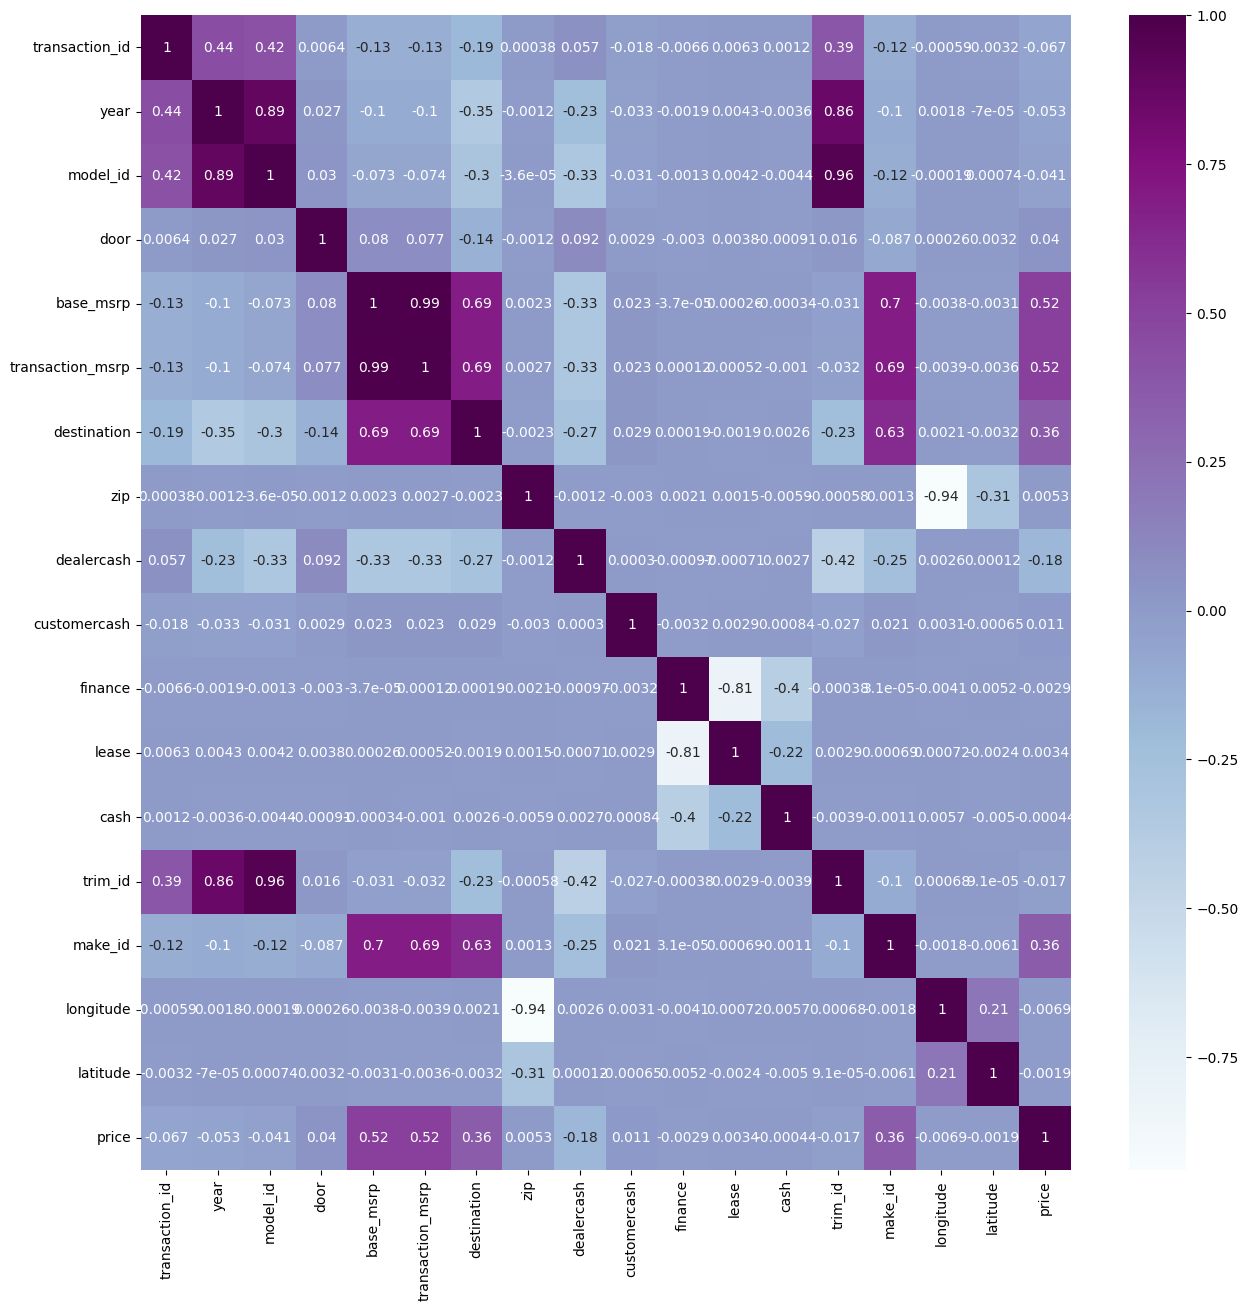

In [ ]:
plt.figure(figsize = (15, 15))

heatmap_data = data[numeric_cols].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

C:\Users\omer_\AppData\Local\Temp\ipykernel_34216\1398819262.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.columns, y=correlations.loc['price'], ax=axs, palette='coolwarm')


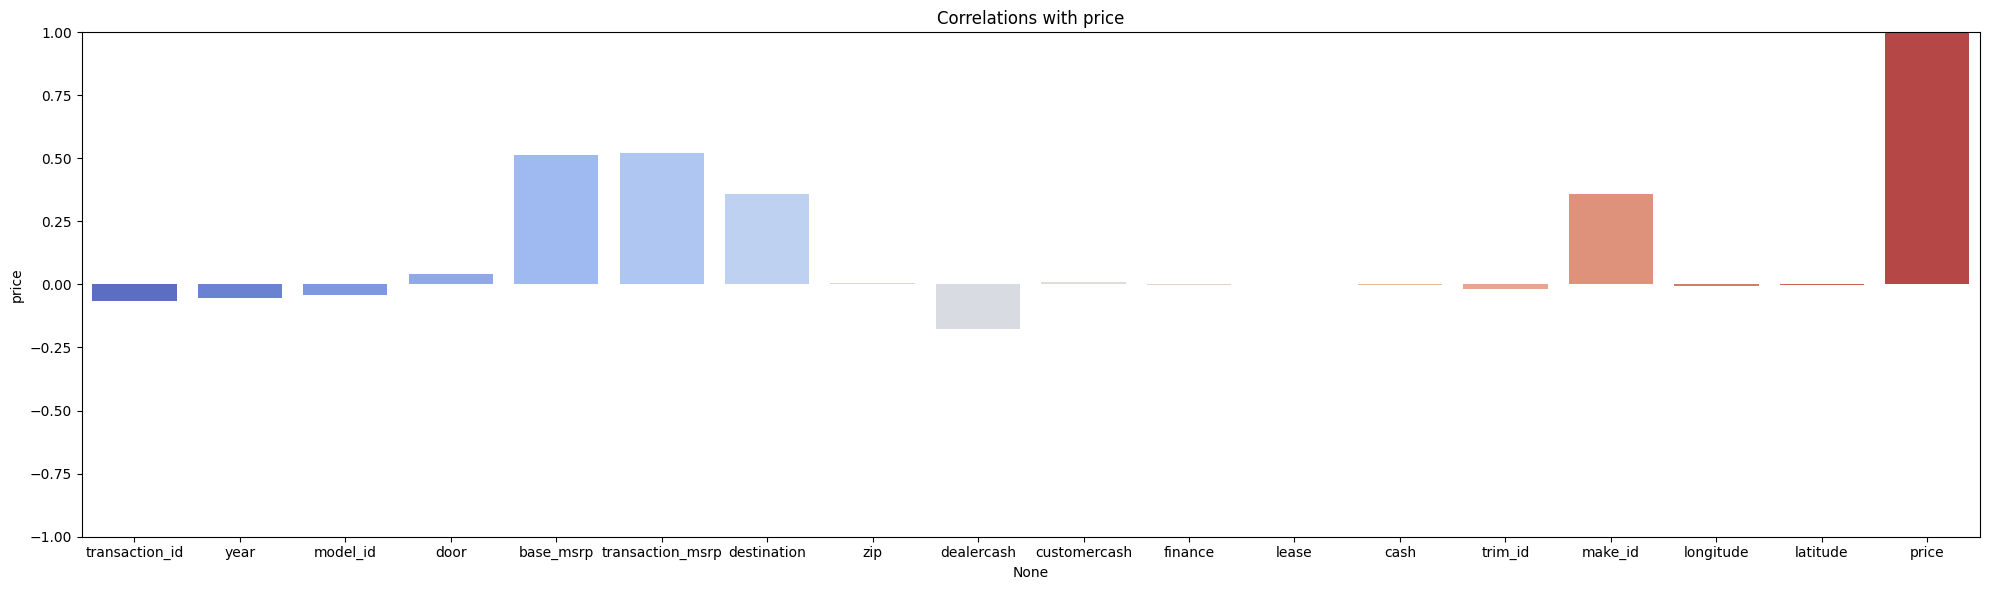

In [ ]:
# Step 2: Create a correlation heatmap
corr_matrix = data[numeric_cols].corr()


# Step 3: Extract specific correlations
# For demonstration, let's assume we want to extract correlations for 'Depo Hacmi' and 'log_Fiyat'
columns_of_interest = ['price']
correlations = corr_matrix.loc[columns_of_interest]

# Step 4: Plot bar charts for the extracted correlations
fig, axs = plt.subplots(1, 1, figsize=(20, 6))

# Bar chart for 'Depo Hacmi' correlations

sns.barplot(x=correlations.columns, y=correlations.loc['price'], ax=axs, palette='coolwarm')
axs.set_title('Correlations with price')
axs.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

C:\Users\omer_\AppData\Local\Temp\ipykernel_28632\4193050296.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


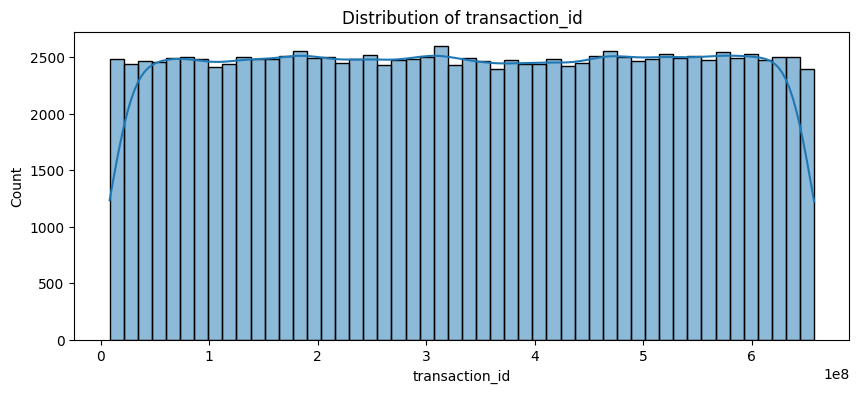

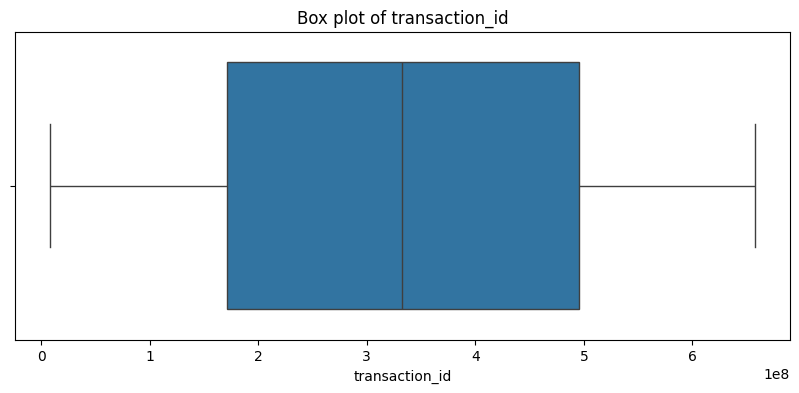

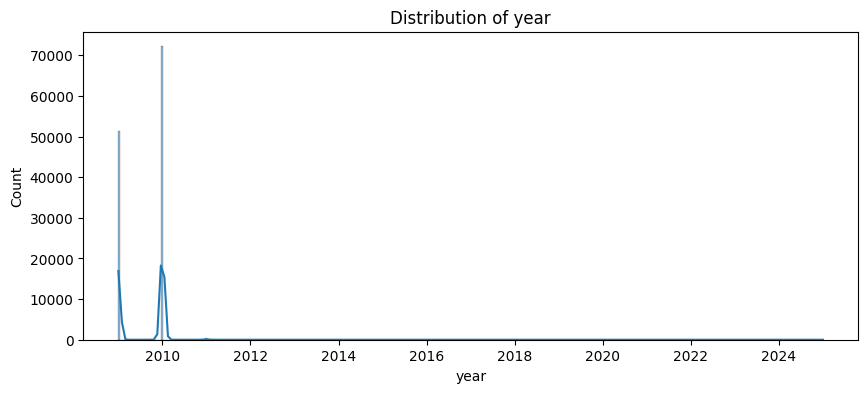

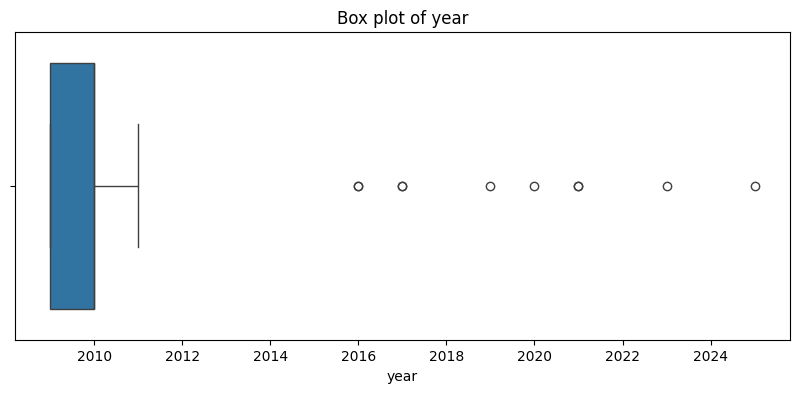

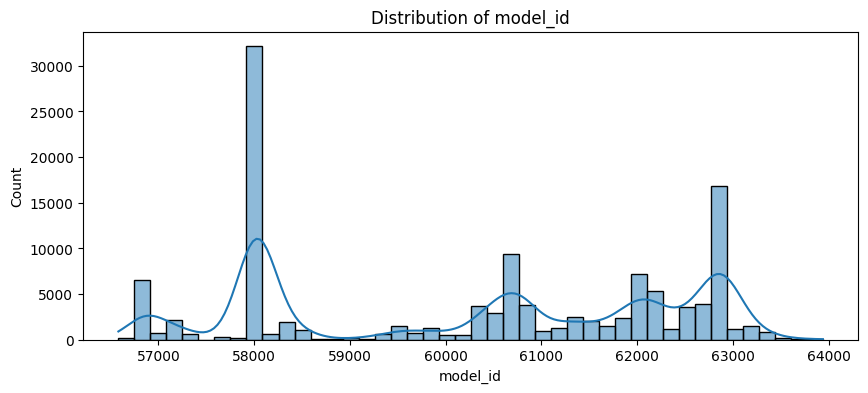

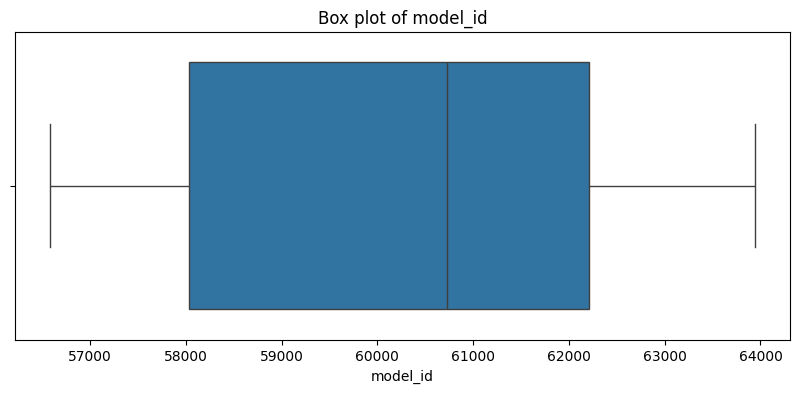

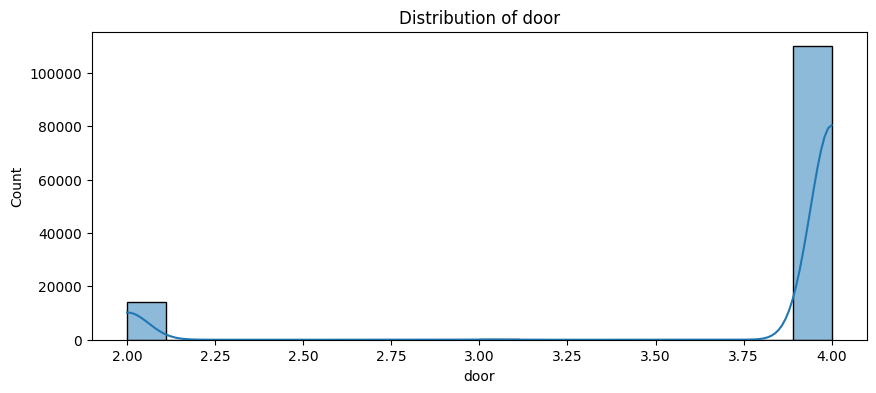

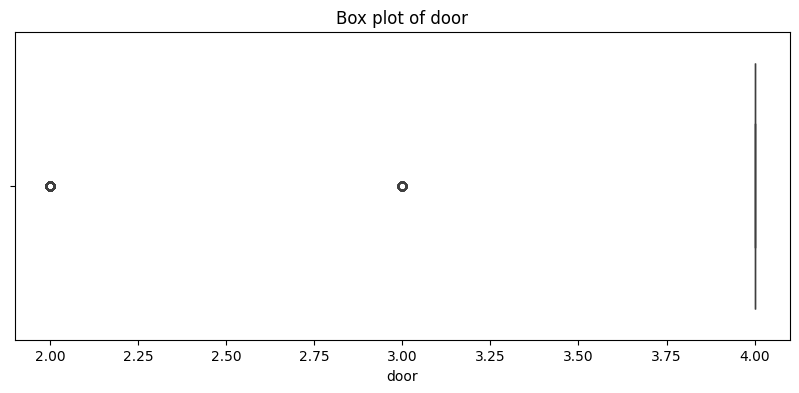

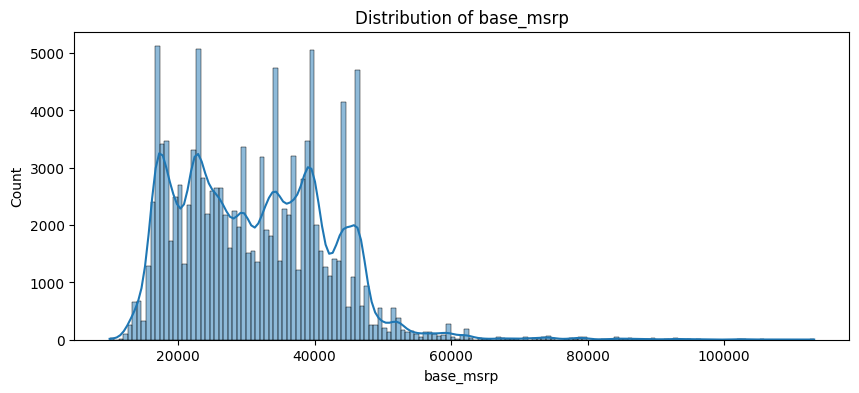

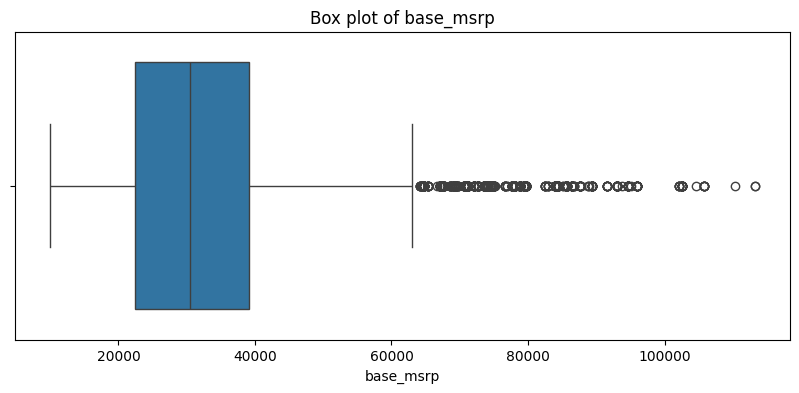

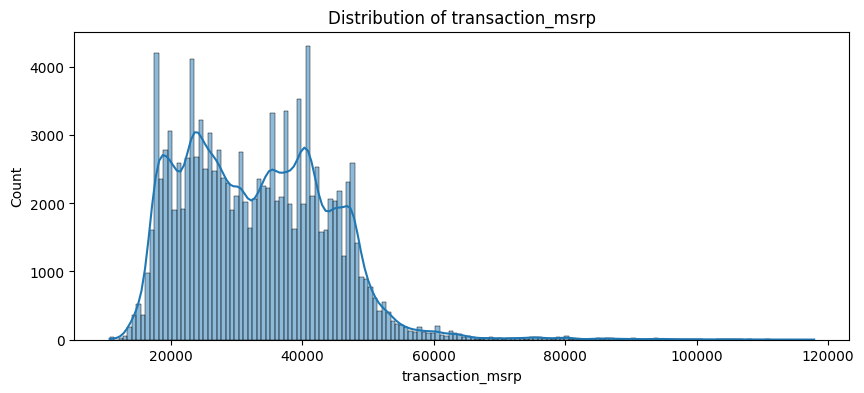

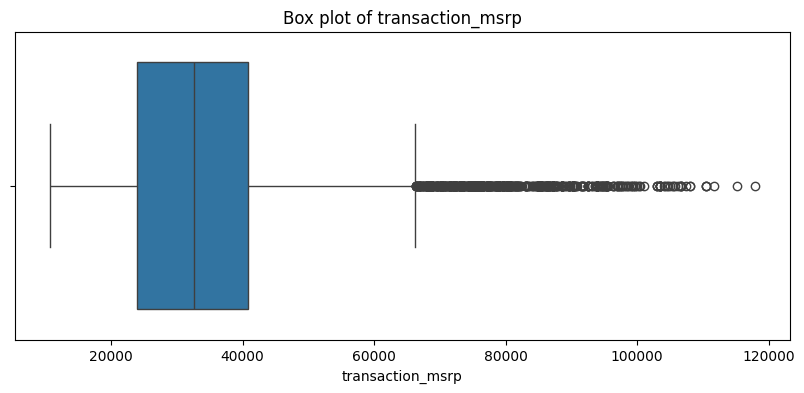

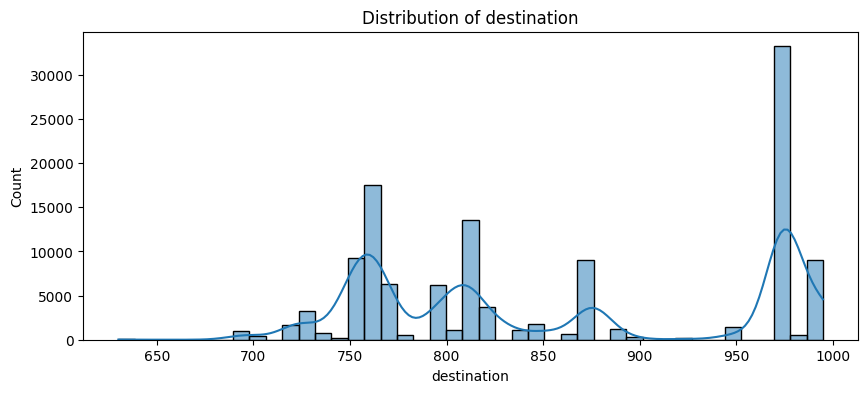

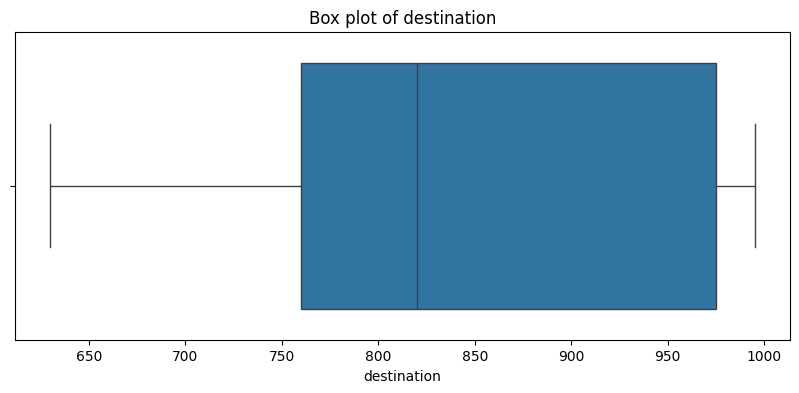

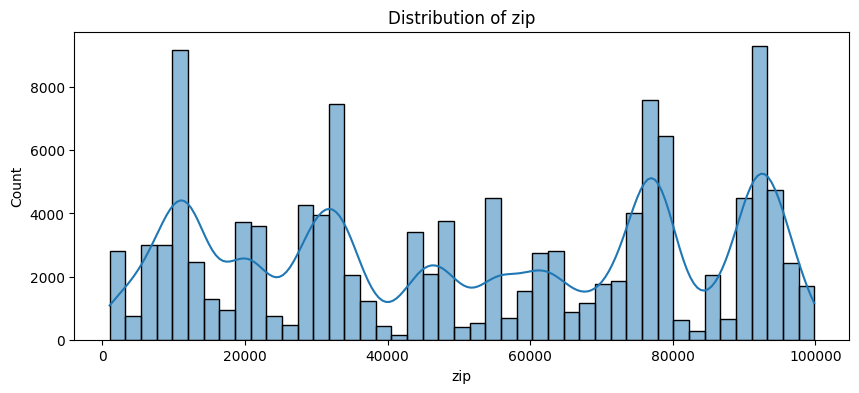

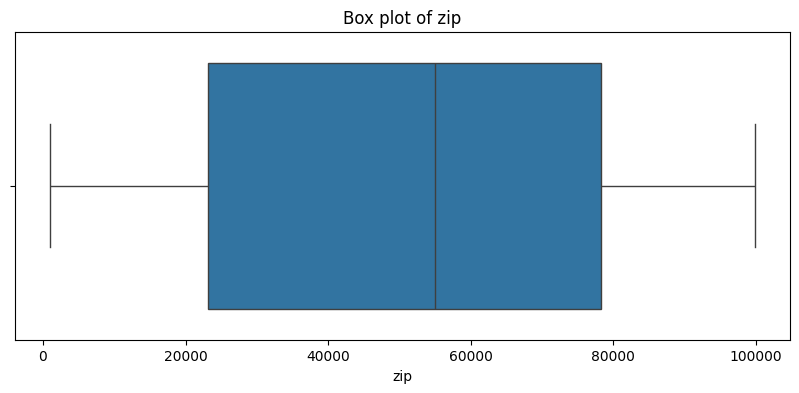

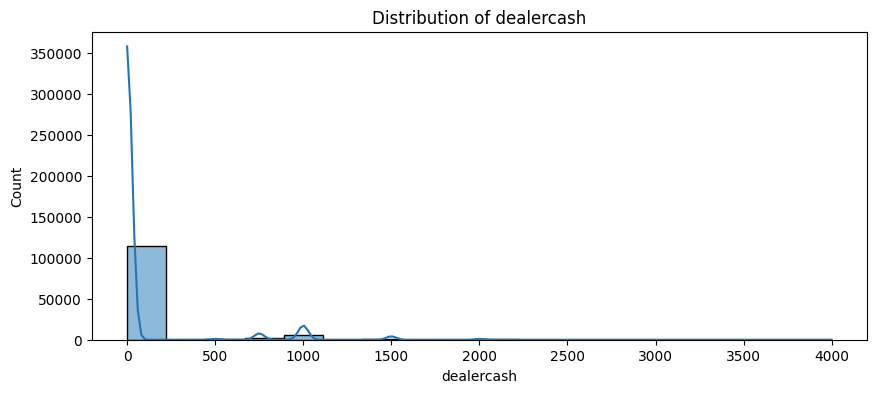

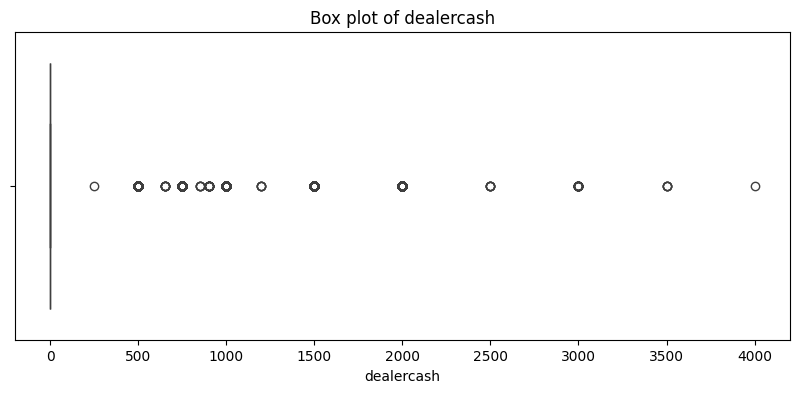

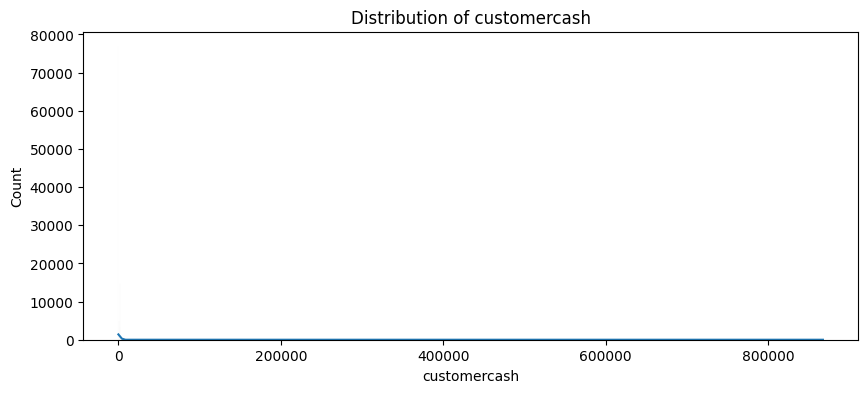

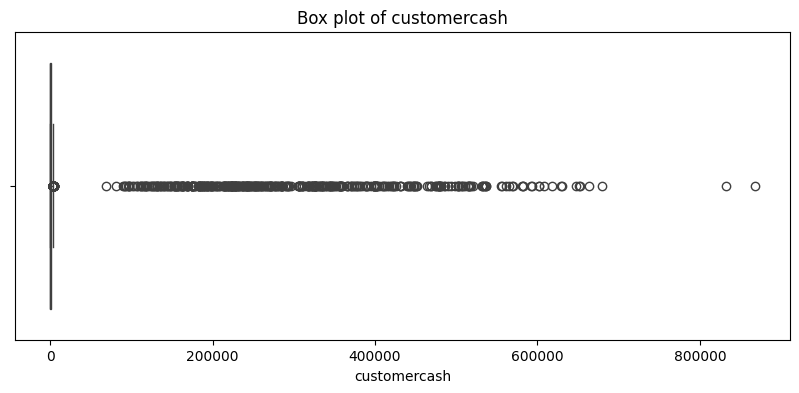

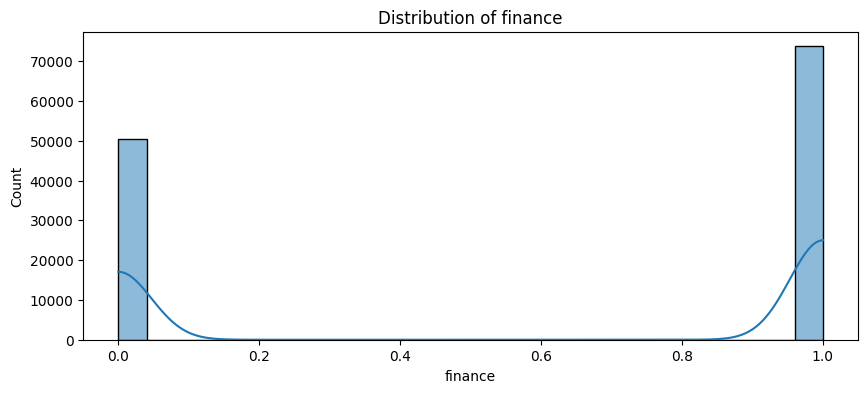

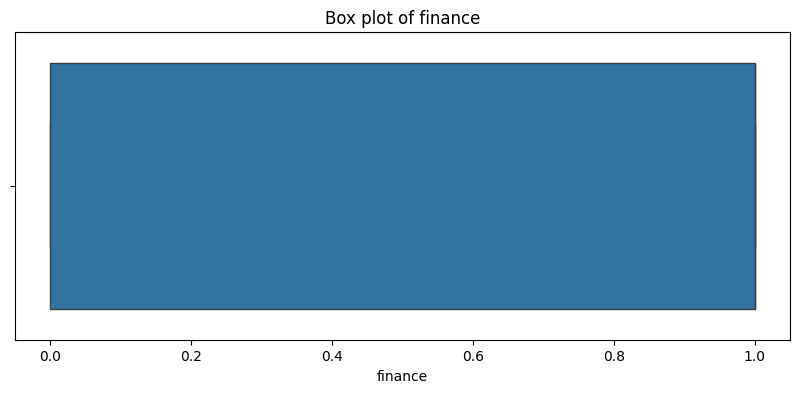

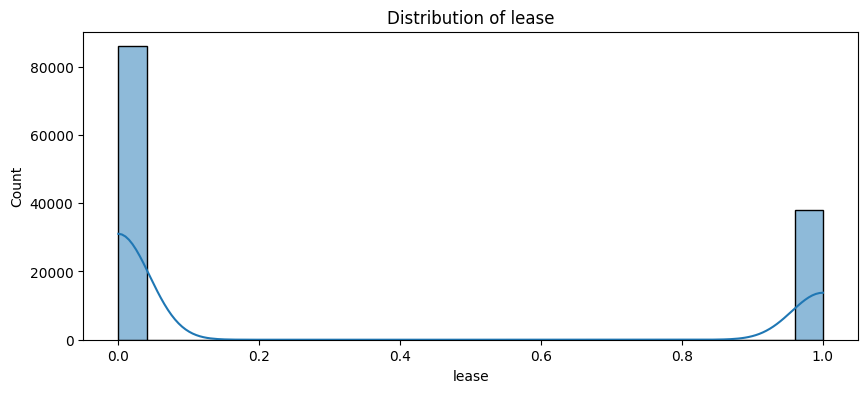

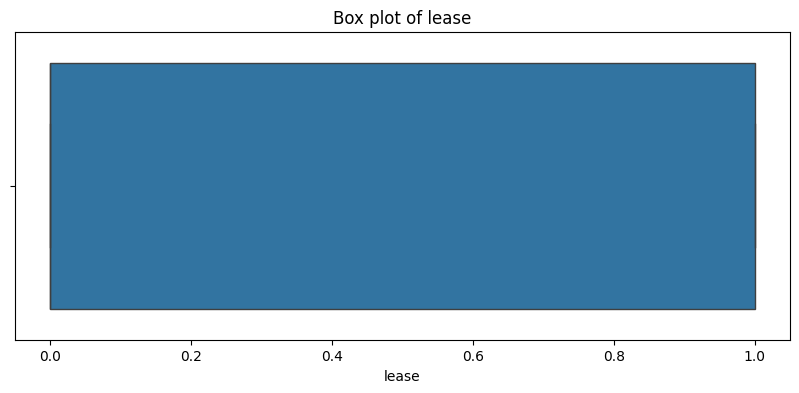

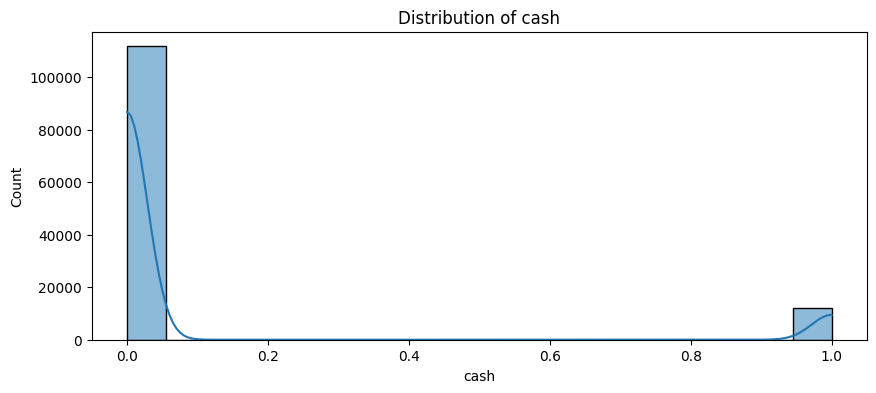

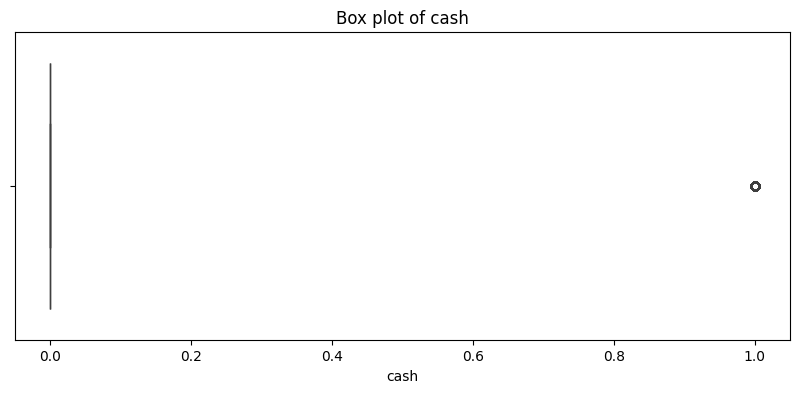

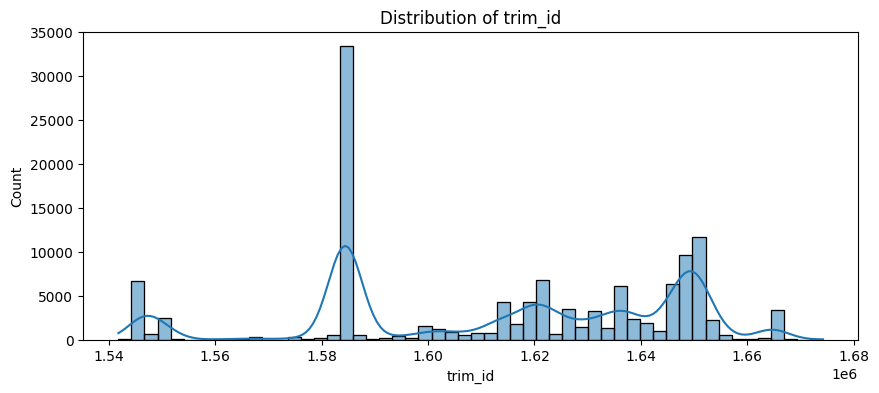

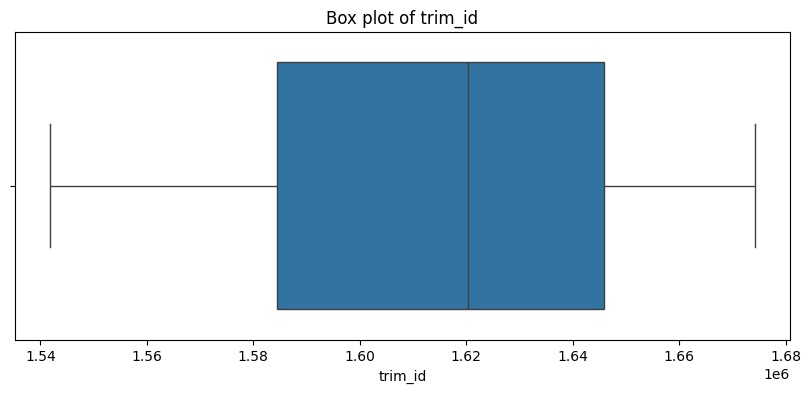

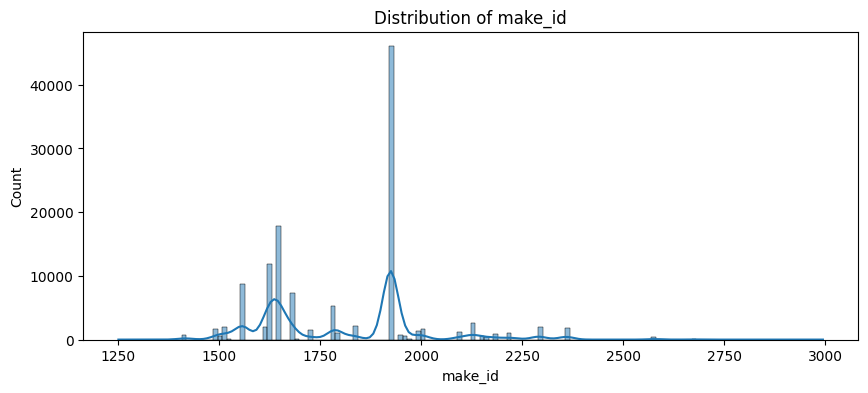

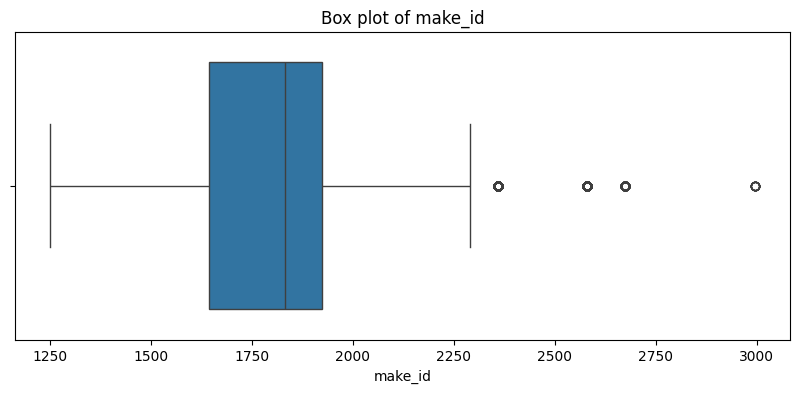

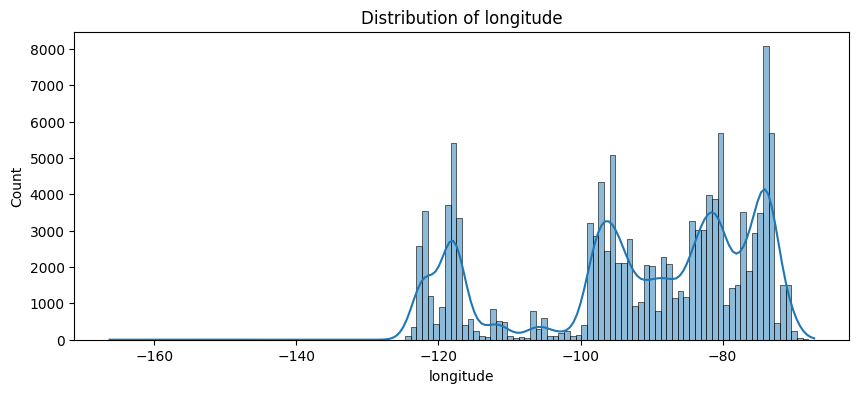

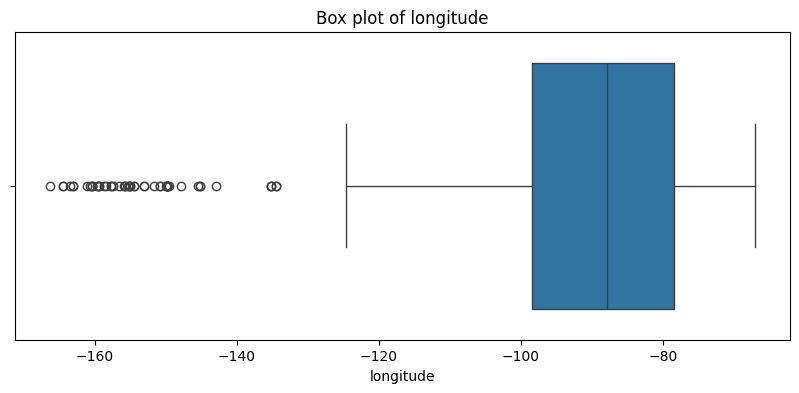

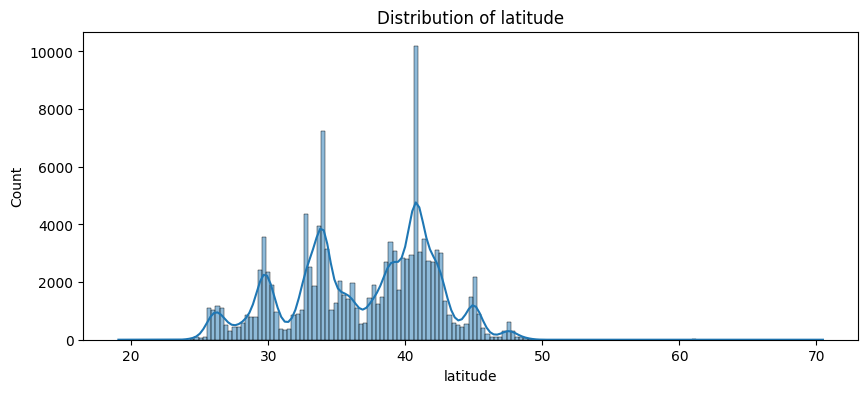

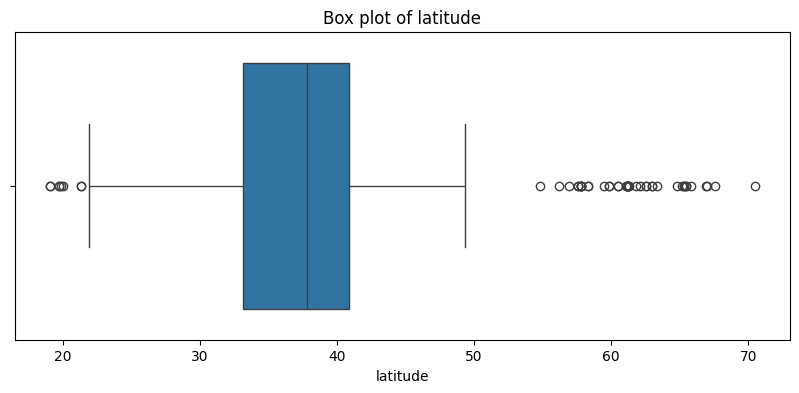

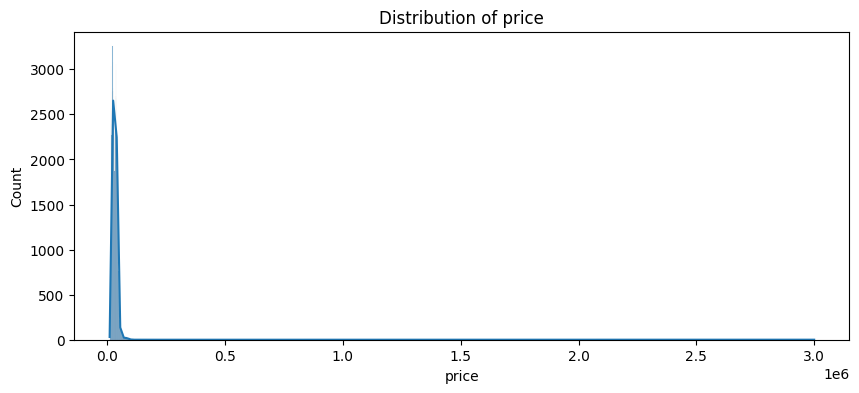

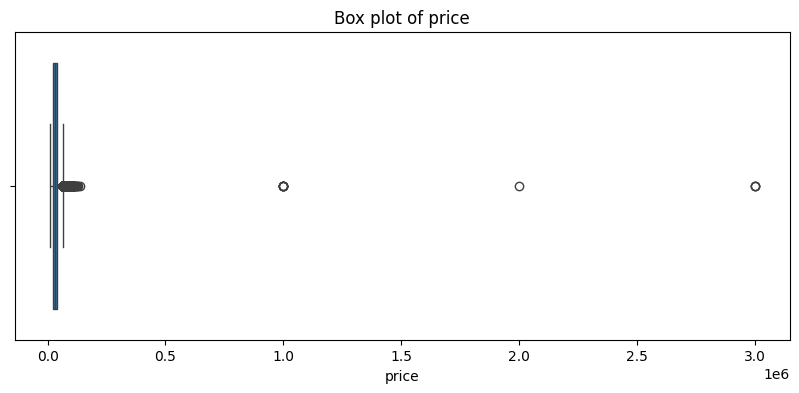

Number of outliers detected using Z-score: 20183
       sales_week sales_date  transaction_id  year        make  model_id  \
6       08MAY2010  08MAY2010       651548701  2010      Toyota     60384   
7       24OCT2009  24OCT2009        28128157  2009       Lexus     59457   
13      23JAN2010  23JAN2010       300822819  2010    Infiniti     62646   
14      27MAR2010  27MAR2010       526362518  2010  Volkswagen     62814   
19      20MAR2010  20MAR2010       490825192  2010      Subaru     62775   
...           ...        ...             ...   ...         ...       ...   
124014  12DEC2009  12DEC2009       178290534  2009      Toyota     56865   
124017  31OCT2009  31OCT2009        39070585  2009        Ford     58029   
124020  27FEB2010  27FEB2010       419953328  2009      Toyota     56865   
124024  23JAN2010  23JAN2010       312381461  2010         BMW     60825   
124025  24APR2010  24APR2010       594753148  2010      Toyota     60384   

              model drive_type  door t

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset
file_path = 'hw_data_set_1.csv'
data = pd.read_csv(file_path)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and box plots for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Calculate Z-scores
z_scores = zscore(data[numerical_columns])

# Define a threshold for Z-scores
threshold = 3

# Identify outliers using Z-score
outliers_z = (abs(z_scores) > threshold).any(axis=1)
print(f'Number of outliers detected using Z-score: {outliers_z.sum()}')
outliers_data_z = data[outliers_z]
print(outliers_data_z)

# Calculate Q1 and Q3 for IQR method
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f'Number of outliers detected using IQR: {outliers_iqr.sum()}')
outliers_data_iqr = data[outliers_iqr]
print(outliers_data_iqr)
